# Importing the libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing the dataset

In [3]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In here, because the first column is encoded to second column, so we will ignore the first column to X variable

---

In here, because we just have only one feature => we can use linear regression

# Training the Linear Regression model on the whole dataset

In [4]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
# Training model step
linear_regressor.fit(X, y)

LinearRegression()

Explain about the above code:
- **linear_regressor**: is an instance of LinearRegression to draws a straight line to based on linear regression
- ```fit(X,y)```: is a function that will watch X, y values and the relationship between them to find out the best straight line to fit the equation: **$y = a + bx$**

# Training the Polynomial Regression model on the whole dataset

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree= 4) # In the past, I tested degree = 2, which isn't fit the actual data, so I decide to set 4
X_polynomial = polynomial_regressor.fit_transform(X)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y)

LinearRegression()

Explain about the above code

- **PolynomialFeatures** is a class that helps you turn the **X** feature to fancier versions like $X^2$, which can appropriate the original logic of **Polynomial Linear Regression**
- ```PolynomailFeatures(degree=2)```: sets up a "curve maker" that can handle polynomials up to degree(power) 2.
- ```X_polynomial = polynomial_regressor.fit_transform(X)```: This is the magic step! It takes your original X (say, just water amounts like ```[1, 2, 3]```) and transforms it into a new version with extra columns. 
    - For example, if X is ```[1, 2, 3]```, X_polynomial becomes something like
        - ```[ [1, 1, 1], [1, 2, 4], [1, 3, 9] ]```
        - Columns are: ```[1, x, x^2]```. The 1 is for the intercept, x is the original value, and $x^2$ is the squared value.
    - So ```fit_transform()``` figures out this transformation and applies it to X

## So why I used two linear_regressor models instead of reuse the first

This is simply because:
- Think of ```linear_regressor``` as a worker trained to use a simple ruler for straight lines. Now you’ve got a fancier tool (```X_polynomial```) that needs a worker who can handle curves. You can’t just give the new tool to the old worker without retraining or starting fresh.

---

Addition
- In Python, when you call ```.fit(X, y)``` on a **LinearRegression** object:
    - It calculates coefficients (like ```a,b```) based on the shape of X (how many columns it has).
    - It stores those coefficients inside the object.
    - If you call ```.fit()``` again on the same object with ```X_polynomial```, it overwrites the old training, losing the straight-line model you made first.

# Visualising the Linear Regression results

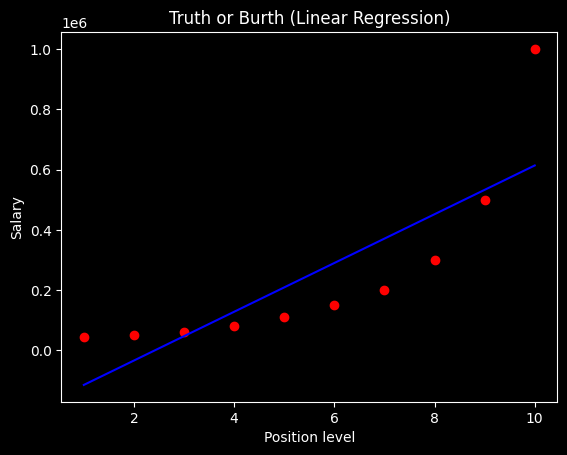

In [6]:
plt.scatter(X, y, color="red")
plt.plot(X, linear_regressor.predict(X), color="blue")
plt.title("Truth or Burth (Linear Regression)")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

The second parameter inside ```plot()``` is the predicted value of linear_regressor model instead of y (actual data). This is because you want to test the trained model

# Visualising the Polynomial Regression results

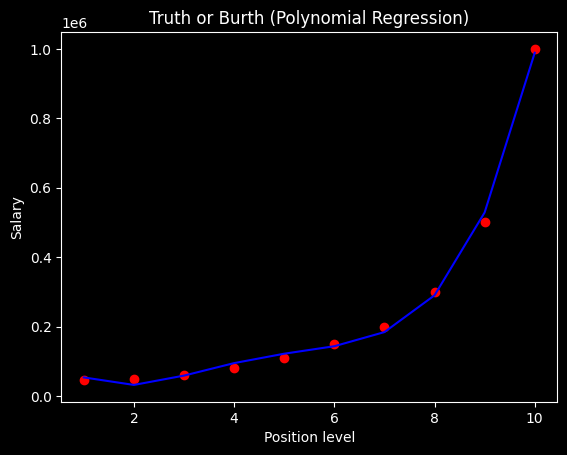

In [11]:
plt.scatter(X, y, color="red")
plt.plot(X, linear_regressor_2.predict(X_polynomial), color="blue")
plt.title("Truth or Burth (Polynomial Regression)")
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Predicting a new result with Linear Regression

In [12]:
linear_regressor.predict([[6.5]])

array([330378.78787879])

## Why in here, you have to pass two-dimensionals array instead of a number or one-dimensional array

This is because ```sklearn``` requires the input parameter of ```predict()``` must be the same type of ```fit()```, so in the ```fit()```, I passed **X**, which is a two-dimensionals array

# Predicting a new result with Polynomial Regression

In [16]:
linear_regressor_2.predict(polynomial_regressor.fit_transform([[6.5]]))

array([158862.45265155])

In here, because **linear_regressor_2** is trained based on 5 inputs (degree = 4), so the predict also want to receive 5 inputs. That is the reason why we use ```polynomial_regressor.fit_transform([[6.5]])```